In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt


In [3]:
data = np.load("toy_data_two_moon.npz")

In [4]:
X_train = torch.FloatTensor(data['arr_0'])
y_train = torch.FloatTensor(data['arr_2'])

X_test = torch.FloatTensor(data['arr_1'])
y_test = torch.FloatTensor(data['arr_3'])

Text(0.5, 1.0, 'Test _data')

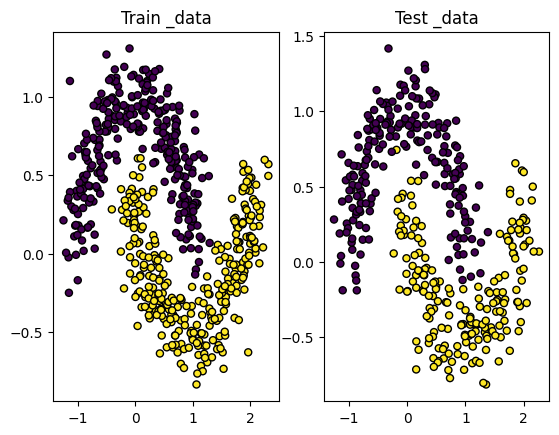

In [5]:
plt.subplot(121)

plt.scatter(X_train[:,0],X_train[:,1],marker='o',c=y_train[:,0],s=26,edgecolors='k')
plt.title("Train _data")
plt.subplot(122)
plt.scatter(X_test[:,0],X_test[:,1],marker='o',c=y_test[:,0],s=26,edgecolors='k')
plt.title("Test _data")

In [16]:
linear = nn.Linear(2,1)
loss_function = nn.MSELoss()

optimizer =  torch.optim.SGD(linear.parameters(), lr=0.1) 

In [17]:
max_epoch= 100

loss_log =[]

acc= []

for epoch in range(max_epoch):
    with torch.no_grad():
        y_test_hat = linear(X_test)
        class_pred = (y_test_hat>= 0.5).float()
        acc.append(float(sum(class_pred == y_test))/ float(y_test.shape[0]))
    
    y_train_hat= torch.sigmoid(linear(X_train))
    loss = loss_function(y_train_hat,y_train)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_log.append(loss.item())

print("accuracy %.2f%%" %(acc[-1]*100))            

accuracy 85.75%


Text(0, 0.5, 'acc')

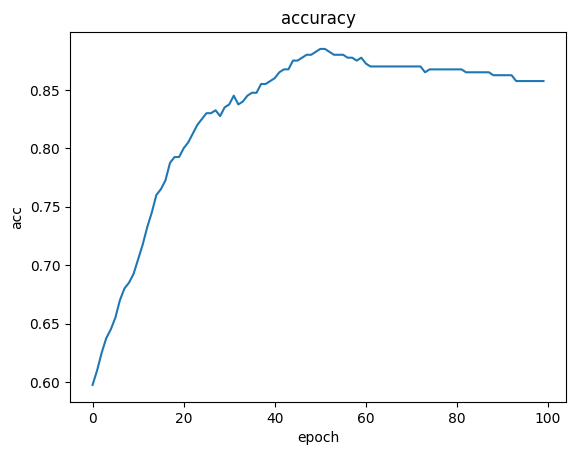

In [18]:
plt.plot(acc)
plt.title("accuracy")
plt.xlabel("epoch")
plt.ylabel("acc")